In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('data/df_analise.csv').set_index('Data')
df.corr()

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Dolar,1.000000,-0.609966,-0.059586,-0.052480,-0.010008,-0.065864,-0.033522
IBOVESPA,-0.609966,1.000000,-0.112394,0.000066,-0.055380,0.030524,-0.143448
IPCA,-0.059586,-0.112394,1.000000,0.389653,0.369186,0.389130,0.967234
IGPM,-0.052480,0.000066,0.389653,1.000000,0.929280,0.925328,0.427384
IGPDI,-0.010008,-0.055380,0.369186,0.929280,1.000000,0.772087,0.399344
IGP10,-0.065864,0.030524,0.389130,0.925328,0.772087,1.000000,0.425475
INPC,-0.033522,-0.143448,0.967234,0.427384,0.399344,0.425475,1.000000


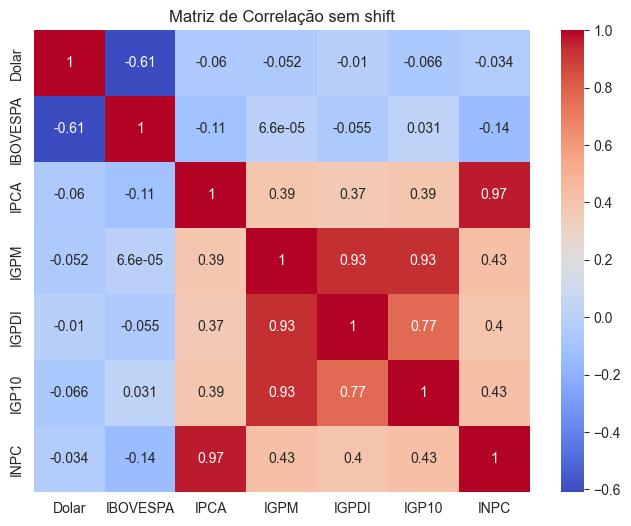

In [125]:
plt.figure(figsize=(8,6))
plt.title('Matriz de Correlação sem shift')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [126]:
def print_corr(correlation_method = 'pearson', maximus = 100, data = df):
    shifts = range(maximus)  # Shifts
    results = {}

    for shift in shifts:
        df_shifted = data[['IBOVESPA', 'IPCA', 'IGPM', 'IGPDI', 'IGP10', 'INPC']].shift(-shift)
        df_shifted = pd.concat([df[['Dolar']], df_shifted], axis=1)

        spearman_corr_shifted = df_shifted.corr(method=correlation_method)
        if 'Dolar' in spearman_corr_shifted.index:
            results[shift] = spearman_corr_shifted.loc['Dolar'][1:]  # Exclude correlation with itself

    # Transform results into a DataFrame for plotting
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Shift (meses)'

    # Plot line graph with a simpler visualization
    plt.figure(figsize=(14, 8))
    for col in results_df.columns:
        sns.lineplot(data=results_df, x=results_df.index, y=col, label=col)

    # Add horizontal lines at 0 and specified intervals
    for line in [0, 0.2, 0.4, 0.6, 0.8, -0.2, -0.4, -0.6, -0.8]:
        plt.axhline(line, color='grey', linestyle='--', alpha=0.8)

    # Cleaned-up title and labels
    plt.title('Correlação de ' + correlation_method + ' entre o Dólar e os Indicadores com Shifts', fontsize=16, fontweight='bold')
    plt.xlabel('Shift (meses)', fontsize=12)
    plt.ylabel('Correlação de' + correlation_method, fontsize=12)
    plt.legend(title='Indicador', loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    # plt.ylim(-1, 1)  # Set y-axis limits to make correlations clearer
    plt.tight_layout()

    # Simplified table of correlations
    max_corr_table = pd.DataFrame({
        'Variável': results_df.columns,
        'Correlação Máxima': results_df.max(),
        'Shift (meses) para Máx': results_df.idxmax(),
        'Correlação Mínima': results_df.min(),
        'Shift (meses) para Mín': results_df.idxmin()
    }).reset_index(drop=True)

    print(max_corr_table.to_string(index=False, float_format="%.4f"))

    plt.show()

Variável  Correlação Máxima  Shift (meses) para Máx  Correlação Mínima  Shift (meses) para Mín
IBOVESPA             0.1804                      64            -0.6100                       0
    IPCA             0.2338                      79            -0.2058                      94
    IGPM             0.1891                       4            -0.2001                      59
   IGPDI             0.2277                      68            -0.1765                      94
   IGP10             0.1919                       5            -0.1963                      95
    INPC             0.2529                      79            -0.2181                      94


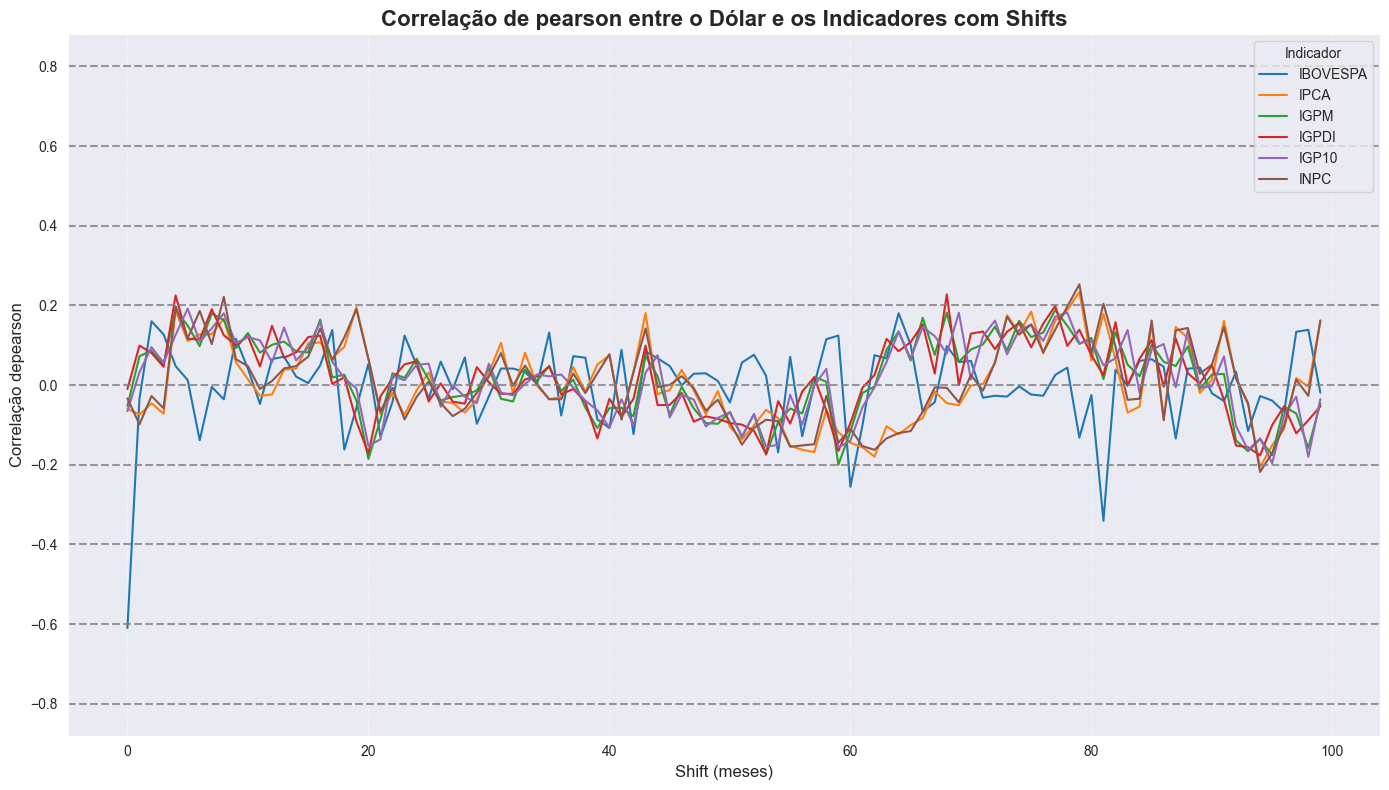

In [127]:
print_corr(correlation_method='pearson')

Intervalo 1
Variável  Correlação Máxima  Shift (meses) para Máx  Correlação Mínima  Shift (meses) para Mín
IBOVESPA             0.5514                      35            -0.6082                       0
    IPCA             0.3205                      30            -0.3547                      35
    IGPM             0.2801                       4            -0.3550                      14
   IGPDI             0.2327                       4            -0.3781                      33
   IGP10             0.2415                      22            -0.3835                      14
    INPC             0.2665                       5            -0.3091                      35


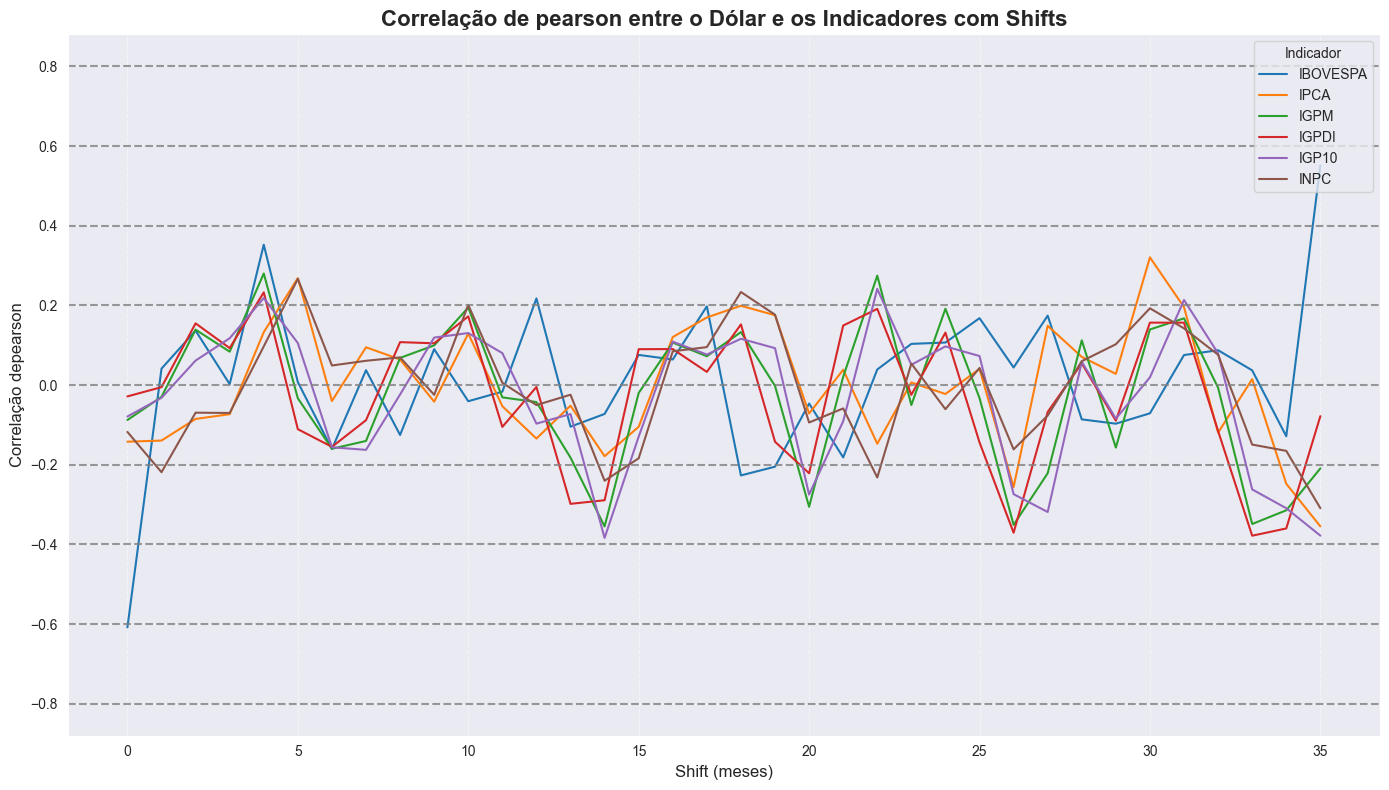

Intervalo 2
Variável  Correlação Máxima  Shift (meses) para Máx  Correlação Mínima  Shift (meses) para Mín
IBOVESPA             0.4231                      13            -0.5618                       0
    IPCA             0.3649                       4            -0.3024                      27
    IGPM             0.3188                       1            -0.3336                      26
   IGPDI             0.4312                       1            -0.3038                      25
   IGP10             0.3511                       2            -0.3617                      21
    INPC             0.3959                       8            -0.3003                      27


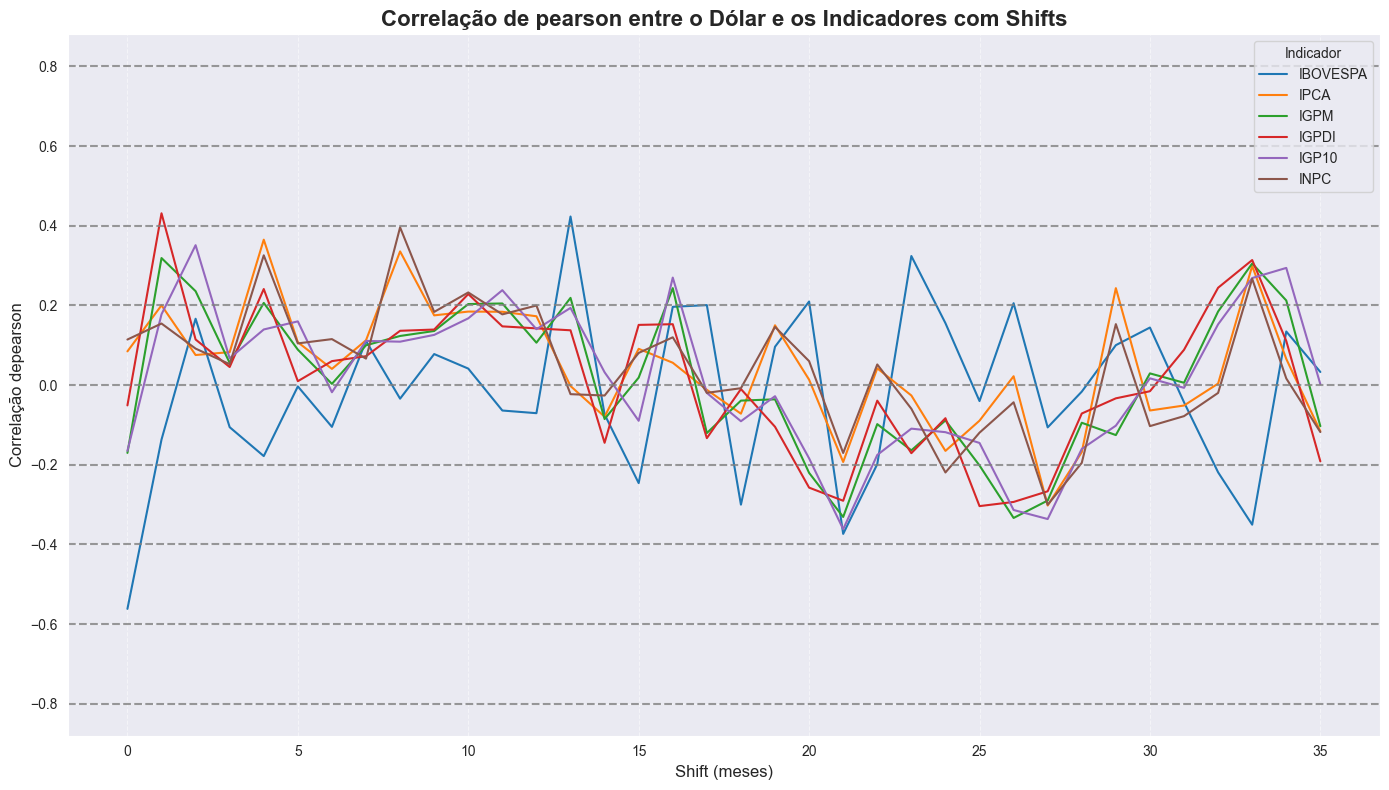

Intervalo 3
Variável  Correlação Máxima  Shift (meses) para Máx  Correlação Mínima  Shift (meses) para Mín
IBOVESPA             0.4477                       3            -0.7057                       0
    IPCA             0.4506                      35            -0.3708                       1
    IGPM             0.4307                      24            -0.3162                      32
   IGPDI             0.4699                      24            -0.2893                      32
   IGP10             0.4797                      25            -0.2554                      32
    INPC             0.3783                      35            -0.3871                       1


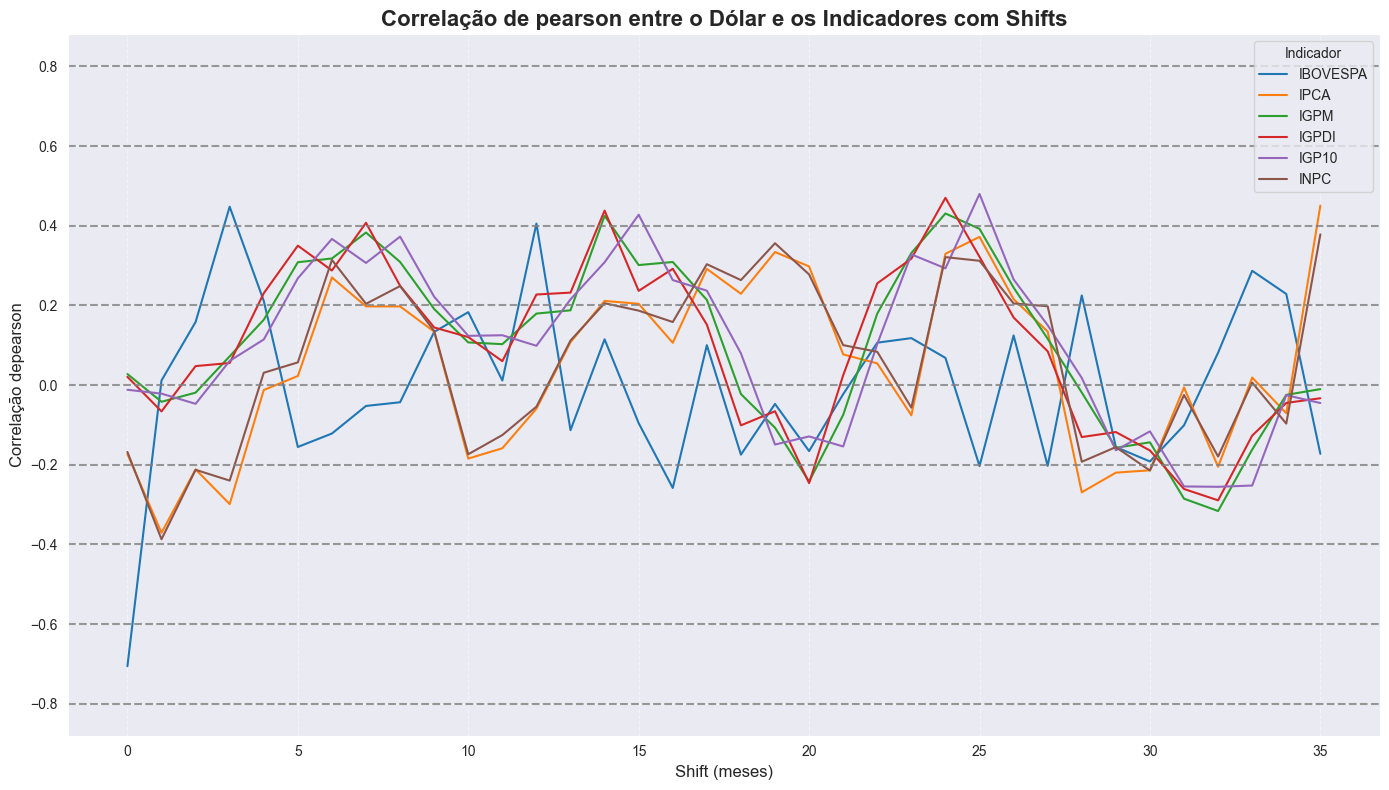

In [128]:
intervals = [
    df.loc[:'dez/2014'],
    df.loc['jan/2015':'dez/2019'],
    df.loc['jan/2020':],
]

for index, data in enumerate(intervals):
    print(f"Intervalo {index + 1}")
    print_corr(data=data, maximus=36)

Consigo ver que minhas correlacoes sao fortemente afetadas por ciclos, preciso indentifica-los